# EDA - Netflix Movies and TV Shows

### Introduction

This is Exploratory Data Analysis using Python of the "Netflix Movies & TV Shows" dataset. The purpose of this project is to find out and visualize the data's main characteristics and trends using statistical methods and data visualization techniques.

### About data :

The Netflix Movies & TV Shows dataset can be found on Kaggle. It contains all TV Shows and Movies metadata available on Netflix. The dataset is updated every month. It contains 8807 records and 12 columns.

### Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataset with pandas

In [63]:
netflix = pd.read_csv("netflix_data.csv")
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### from above data table we can say that our dataset have 8807 rows and 12 columns

In [3]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### So, most of columns in the dataset is based on string datatype. Also director, country, date_added, cast and rating   have missing value
### But we have to change the datatype of column "date_added", from string to timestamp (pandas  datetime object)

In [4]:
netflix["date_added"]=pd.to_datetime(netflix["date_added"])
netflix.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

### Handling missing values and cleaning the data

In [5]:
netflix.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

###  here are missing values in column director,cast,country and date_added.
### We can't randomly fill the missing values in columns of director and cast, so we can drop them.
### For minimal number of missing values in country and date_added,rating, we can fill them using mode(most common value) and mean.

In [6]:
# filling the missing value in column 
netflix['country'] = netflix['country'].fillna(netflix['country'].mode()[0])
netflix['date_added'] = netflix['date_added'].fillna(netflix['date_added'].mode()[0])
netflix['rating'] = netflix['rating'].fillna(netflix['rating'].mode()[0])
netflix['duration']= netflix['duration'].fillna(netflix['duration'].mode()[0])

In [7]:
# dropping unnecessary column with huge missing values (director,cast)
netflix.drop(["director","cast"],axis=1,inplace=True)
print(netflix.columns) # To get the column name

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [8]:
# Checking for duplicates 
netflix['show_id'].duplicated().any()

False

* hence there is no duplicate entries in our data

In [9]:
netflix.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [10]:
# we have by deafault indexing but we can set column "show_id" as our index column instead of droping it
netflix.set_index("show_id",inplace=True)
netflix.head()

,type,title,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Exploratory Data Analysis

* Checking unique type of data in the column 'Type'

In [11]:
netflix["type"].unique()  # it will show unique data entries in selected column

array(['Movie', 'TV Show'], dtype=object)

* Here we can say that there are two type of media "Movies" & "TV Show"

### Q.1)  How many Movies & TV Shows are in streaming platform ? Show with Bar Graph.

In [12]:
netflix.head(2) # just for look into data

,type,title,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [13]:
netflix["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [14]:
import warnings
warnings.filterwarnings("ignore")

[Text(0.5, 1.0, 'Movie vs TV show')]

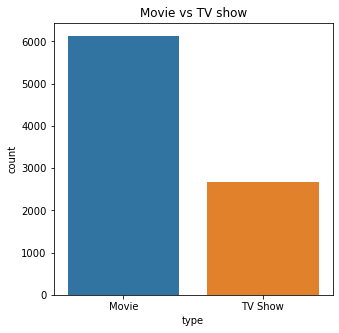

In [15]:
plt.figure(figsize=(5,5))
sns.countplot(netflix["type"],x="Type of Media").set(title='Movie vs TV show')

### From above we conclude that there are 6131 Movies and 2676 TV Shows on Netflix.
### There are more Movies on Netflix than TV shows.

### Q.2) In which year highest number of the TV shows & movies were added in streaming platform ? Show with Bar Graph.


In [16]:
netflix.head(1) # look into data

,type,title,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [17]:
# This question is related with the datetime format. first of all i check datatype of my datatime column "date_added"
# we already convert out "date_added" column form object to datetime datatype.
netflix.dtypes

type                    object
title                   object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [18]:
added_years=netflix["date_added"].dt.year.value_counts().sort_index(ascending=False)# from datetime column we only count the year 
added_years[0:14]

2021    1498
2020    1889
2019    2016
2018    1649
2017    1188
2016     429
2015      82
2014      24
2013      11
2012       3
2011      13
2010       1
2009       2
2008       2
Name: date_added, dtype: int64

Text(0, 0.5, 'No. of Media Added')

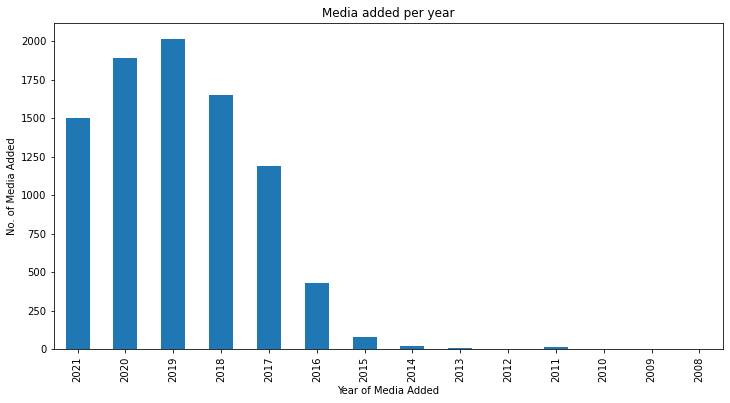

In [19]:
plt.figure(figsize=(12,6))
added_years.plot(kind="bar",title="Media added per year")
plt.xlabel("Year of Media Added")
plt.ylabel("No. of Media Added")

### 2019 is the year with the most content addition on the streaming platform, 2016 movie/tv-shows added, followed by 2020 with 1889, and 2018 with 1649 total.
### In between year 2017 to 2021 most of the media is added on streaming platform. 
### In between year 2008 to 2015 very few media is added on streaming platform.
### we can also say that from 2017 media adding rate is gradually increase.

### Q.3) How many Movies/TV shows release by year?

In [20]:
netflix["release_year"].value_counts() # it count the how much time value will occure in column.

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1966       1
1925       1
1947       1
1959       1
1961       1
Name: release_year, Length: 74, dtype: int64

Text(0.5, 0, 'year of release')

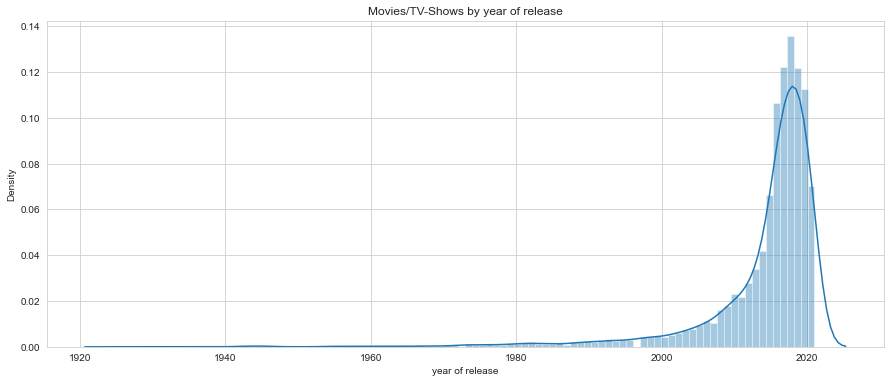

In [21]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.distplot(netflix["release_year"],bins=100).set_title("Movies/TV-Shows by year of release")
plt.xlabel("year of release")

### In year 2018 highest 1147 number of Movies/TV Shows was released and in year 2017 & year 2019 almost same number of Movies/TV Shows was released.
### In between year 1920 to 2000 there are very few media was released.
### From graph we can say that most of Movies/TV Shows was released in between year 2016 to 2020.  

### Q.4) Which are the top 5 countries with the most streaming content?

In [22]:
netflix.head(2)

,type,title,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [23]:
netflix["country"].value_counts().head(5)

United States     3649
India              972
United Kingdom     419
Japan              245
South Korea        199
Name: country, dtype: int64

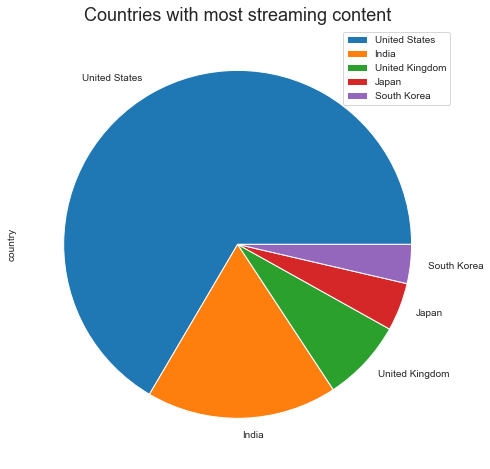

In [24]:
plt.figure(figsize=(10,8))
netflix["country"].value_counts().head(5).plot(kind="pie")
plt.title("Countries with most streaming content",size=18)
plt.legend()

### United States, India , United Kingdom, Japan, South Korea are the top 5 coutries with most streaming content.
### United States is the country with most streaming content followed by India is 2nd country with most streaming content.


### Q.5) which is top 10 most popular genre of movies are available on netflix?

In [25]:
netflix.head(1)

,type,title,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [26]:
netflix = netflix.rename(columns={"listed_in":"Genre"}) # Rename the column "listed_in" to "Genre" for better understanding
netflix['Genre'] = netflix['Genre'].apply(lambda x: x.split(",")[0]) # split the Genre which is seperated by commas.
netflix['Genre'].head()

show_id
s1             Documentaries
s2    International TV Shows
s3            Crime TV Shows
s4                Docuseries
s5    International TV Shows
Name: Genre, dtype: object

In [27]:
netflix[(netflix["type"]=="Movie")]["Genre"].value_counts()[0:10]

Dramas                      1600
Comedies                    1210
Action & Adventure           859
Documentaries                829
Children & Family Movies     605
Stand-Up Comedy              334
Horror Movies                275
International Movies         128
Classic Movies                80
Thrillers                     65
Name: Genre, dtype: int64

Text(0.5, 1.0, 'Top 10 Genres of Movies available on Netflix')

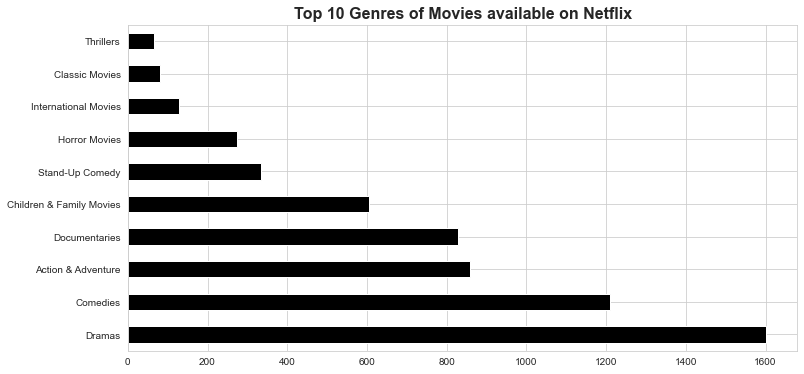

In [28]:
plt.figure(figsize=(12,6))
netflix[netflix["type"]=="Movie"]["Genre"].value_counts()[:10].plot(kind="barh",color="black")
plt.title("Top 10 Genres of Movies available on Netflix",size=16,fontweight="bold")

### Dramas is most popular genre of movies available on netflix.

### followed by Comedies, Action & Adventure, Documentaries, children & family movies are the remaining top genre of movies available on netflix.

### Q.6) which is top 10 most popular genre of TV Shows available on netflix?

In [29]:
netflix[netflix["type"]=="TV Show"]["Genre"].value_counts()[0:10]

International TV Shows    774
Crime TV Shows            399
Kids' TV                  388
British TV Shows          253
Docuseries                221
Anime Series              176
TV Comedies               120
Reality TV                120
TV Dramas                  67
TV Action & Adventure      40
Name: Genre, dtype: int64

Text(0.5, 1.0, 'Top 10 Genres of TV Shows available on Netflix')

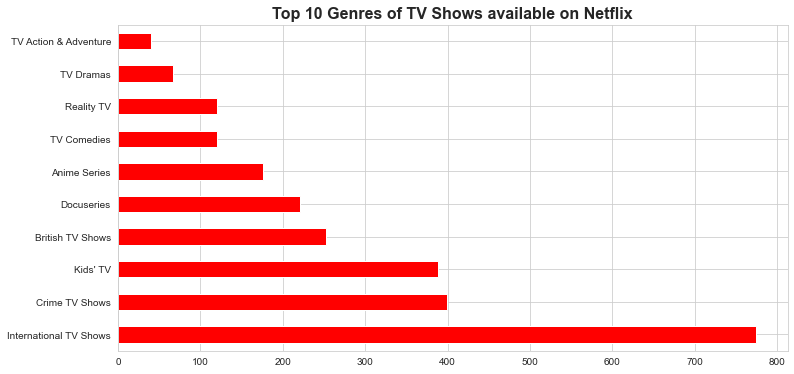

In [30]:
plt.figure(figsize=(12,6))
netflix[netflix["type"]=="TV Show"]["Genre"].value_counts()[:10].plot(kind="barh",color="red")
plt.title("Top 10 Genres of TV Shows available on Netflix",size=16,fontweight="bold")

### International TV Shows is most popular genre of TV shows on netflix.

### followed by Crime TV Shows, kids TV, British TV Shows are the remaining top genre of TV shows available on Netflix.

### Q.7) Which is most common rating for Movies/TV-Shows on Netflix?

In [31]:
netflix.head(2)

,type,title,country,date_added,release_year,rating,duration,Genre,description
show_id,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [32]:
nf_rating=netflix.groupby("rating").rating.count().sort_values(ascending=False)
nf_rating[0:15]

rating
TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
74 min         1
Name: rating, dtype: int64

Text(0.5, 1.0, 'Media Rating available on Netflix')

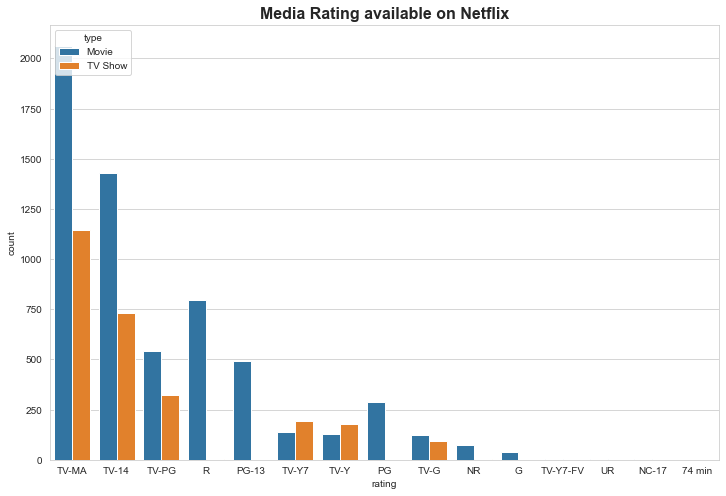

In [33]:
plt.figure(figsize=(12,8))
sns.countplot(x="rating",data=netflix,hue="type",order=nf_rating.index[0:15])
plt.title("Media Rating available on Netflix",size=16,fontweight="bold")

### The largest count of movies/TV Shows are made with the 'TV-MA' rating. "TV-MA" is a rating assigned to content that was designed for mature audiences only.
### Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.
### Third largest is the very popular 'R' rating. "R" rated is media having material which may be unsuitable for children under the age of 17.

### Q.8) How movies are distributed according to duration or what is good amount of movie duration ?

In [34]:
netflix.head(2)

,type,title,country,date_added,release_year,rating,duration,Genre,description
show_id,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [35]:
netflix_movies=netflix[netflix["type"]=="Movie"]
netflix_movies.head(2)

,type,title,country,date_added,release_year,rating,duration,Genre,description
show_id,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s7,Movie,My Little Pony: A New Generation,United States,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [36]:
netflix_movies[netflix_movies["duration"]== '1 Season']

,type,title,country,date_added,release_year,rating,duration,Genre,description
show_id,,,,,,,,,
s5542,Movie,Louis C.K. 2017,United States,2017-04-04,2017,74 min,1 Season,Movies,"Louis C.K. muses on religion, eternal love, gi..."
s5795,Movie,Louis C.K.: Hilarious,United States,2016-09-16,2010,84 min,1 Season,Movies,Emmy-winning comedy writer Louis C.K. brings h...
s5814,Movie,Louis C.K.: Live at the Comedy Store,United States,2016-08-15,2015,66 min,1 Season,Movies,The comic puts his trademark hilarious/thought...


In [37]:
netflix_movies=netflix_movies.drop(['s5542','s5795','s5814'])

In [38]:
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration'].astype(int)
netflix_movies['duration'].value_counts()

90     152
94     146
97     146
93     146
91     144
      ... 
16       1
200      1
18       1
205      1
230      1
Name: duration, Length: 205, dtype: int64

Text(0.5, 1.0, 'Movie duration Analysis')

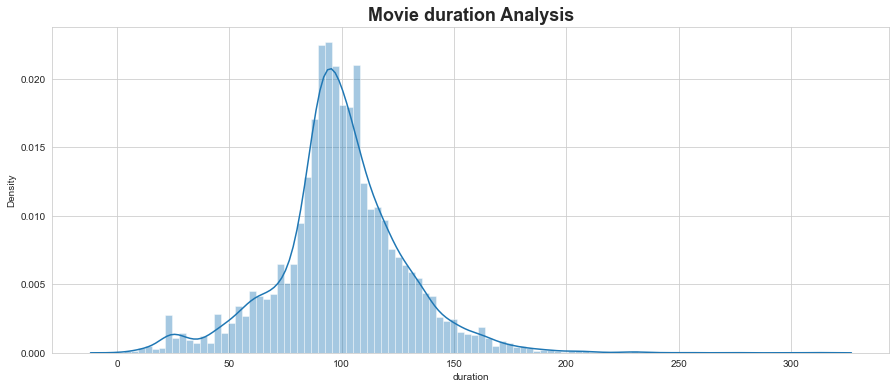

In [39]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.distplot(netflix_movies["duration"],bins=100)
plt.title("Movie duration Analysis",size=18,fontweight="bold")

### A good amount of movies on Netflix are among the duration of 75-120 mins.
### we can also say most of the people cannot watch a 3 hour movie in one sitting.

### Q.9) How TV Shows are distributed according to Season ?

In [40]:
netflix_Shows = netflix[netflix["type"]=="TV Show"]
netflix_Shows.head(2)

,type,title,country,date_added,release_year,rating,duration,Genre,description
show_id,,,,,,,,,
s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,United States,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...


In [41]:
netflix_Shows['duration']=netflix_Shows['duration'].str.replace(' Season','')
netflix_Shows['duration']=netflix_Shows['duration'].str.replace('s','')
netflix_Shows['duration']=netflix_Shows['duration'].astype(str).astype(int)
netflix_Shows['duration'].value_counts()

1     1793
2      425
3      199
4       95
5       65
6       33
7       23
8       17
9        9
10       7
13       3
12       2
11       2
15       2
17       1
Name: duration, dtype: int64

Text(0, 0.5, 'No. of Media Added')

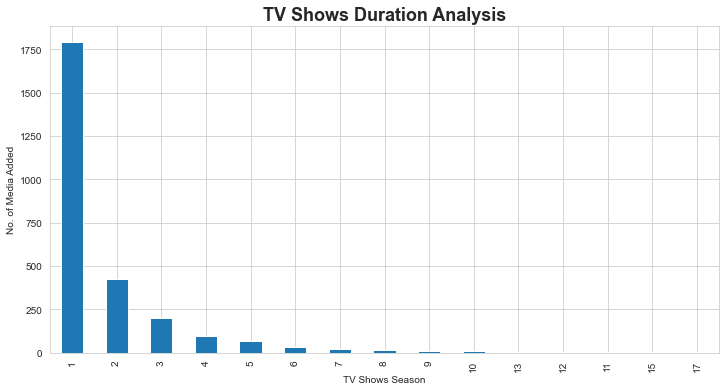

In [42]:
plt.figure(figsize=(12,6))
netflix_Shows['duration'].value_counts().plot(kind="bar")#,title="Media added per year")
plt.title("TV Shows Duration Analysis",size=18,fontweight="bold")
plt.xlabel("TV Shows Season")
plt.ylabel("No. of Media Added")

### Q.10) If a producer wants to release some content, which month must he do so?( Month when least amount of content is added)

In [43]:
netflix.head(1)

,type,title,country,date_added,release_year,rating,duration,Genre,description
show_id,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [44]:
netflix["month_add"]= netflix["date_added"].dt.month_name().astype("str")
netflix["year_add"]= netflix["date_added"].dt.year

In [45]:
netflix.head(2)

,type,title,country,date_added,release_year,rating,duration,Genre,description,month_add,year_add
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",September,2021


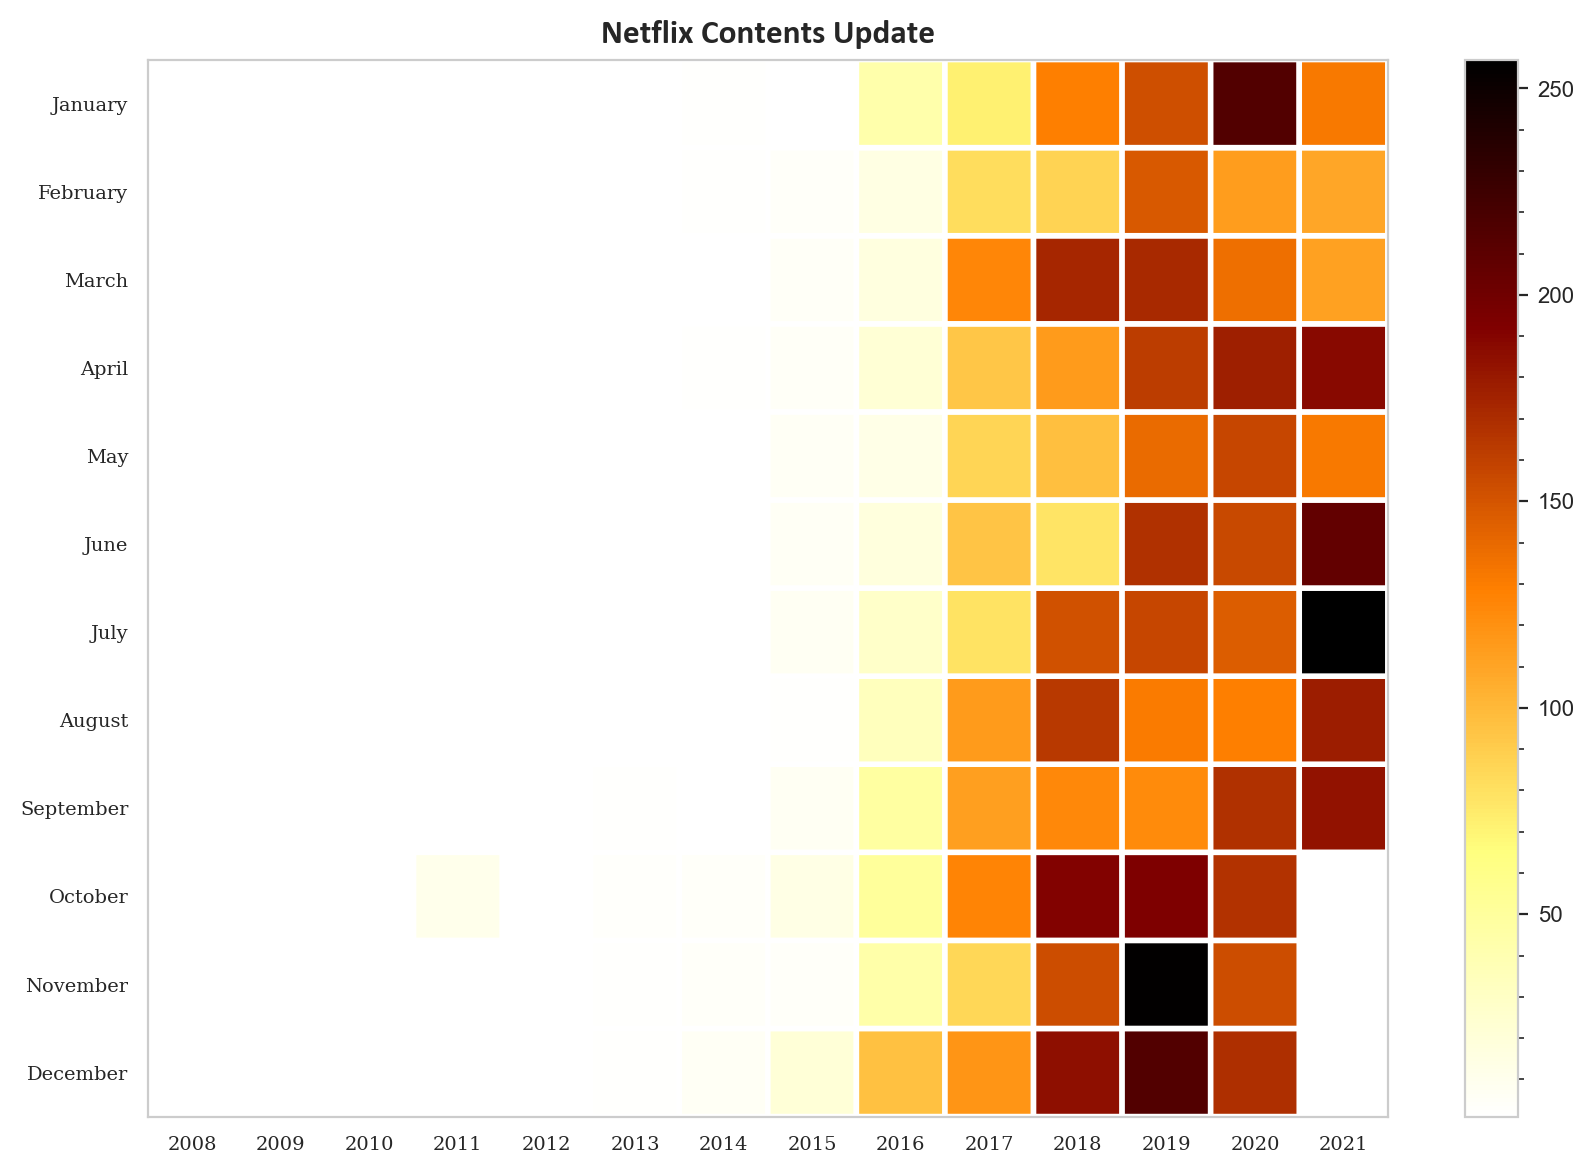

In [62]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
               'September', 'October', 'November', 'December'][::-1]
nf = netflix.groupby('year_add')['month_add'].value_counts().unstack()[month_order].T

plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(nf, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(nf.columns), 1), nf.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(nf.index), 1), nf.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold')
cbar = plt.colorbar()
cbar.solids.set_edgecolor("face")

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

### If the year 2020 is considered, February and August were the months when comparatively much less content was released.Therefore, these months may be a good choice for the success of a new release!
### If the year 2021 is considered upto month September, February, March & May were the months when comparatively much less content was released.Therefore, these months may be a good choice for the success of a new release!

In [65]:
netflix["release_year"]

0       2020
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2007
8803    2018
8804    2009
8805    2006
8806    2015
Name: release_year, Length: 8807, dtype: int64

In [66]:
netflix["release_year"].values

array([2020, 2021, 2021, ..., 2009, 2006, 2015], dtype=int64)